<a href="https://colab.research.google.com/github/obeabi/Stats/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hands-on Finding Correlation between two varaiables with Python (
## Date: 24th April 2023
## Prepared by : Abiola Obembe
## Sponsored by : Analysts HQ


In [1]:
# Install dependcies
!pip install pingouin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from scipy.stats import pearsonr, pearson3


from pingouin import rcorr 

plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline
print("libraries installed succesfully!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=f69bbf908c72c0ec6a5cd925ed84095ce8245e7084333503e121e2daa5686be9
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils
libraries installed succesfully!




## Data Set Information:

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.


Attribute Information:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [2]:
# URL for datasets
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

# Read dataset 
column_headers = ['symboling', 'normalized_losses', 'make', 'fuel_type'\
                  , 'aspiration','num_of_doors','body_style', 'drive_wheels' \
                  , 'engine_location', 'wheel_base', 'length', 'width'\
                  , 'height', 'curb_weight', 'engine_type', 'num_of_cylinders'\
                  , 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio' \
                  , 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
df = pd.read_csv(url,error_bad_lines=True , delimiter= ',',encoding = 'utf_8_sig', engine= 'python' ,names= column_headers )

df.head()

<ipython-input-2-9c1c4256c7e0>:11: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(url,error_bad_lines=True , delimiter= ',',encoding = 'utf_8_sig', engine= 'python' ,names= column_headers )


,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Data Wrangling

In [3]:
## Inspect dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [4]:
# Replace '?' with null values
df.replace('?', np.nan, inplace= True)

df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# Check missing values
df.isna().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [6]:
## Drop missing values in dataset for price
df.dropna(subset = ['price'],  inplace= True)
df.reset_index(drop = True, inplace = True)
df.isna().sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [7]:
# Change fields to appropriate datatype

df[['bore', 'price', 'stroke', 'horsepower', 'peak_rpm', 'normalized_losses' ]] = \
    df[['bore', 'price', 'stroke', 'horsepower', 'peak_rpm' , 'normalized_losses']].astype('float')


# Replace missing values in normalized losses, bore, stroke, horsepower,and peak_rpm column with mean
df['normalized_losses'] = df['normalized_losses'].fillna(df.normalized_losses.mean())
#df['normalized_losses'] = df['normalized_losses'].ffill()

#df['bore'] = df['bore'].fillna(df.bore.mean())
df['bore'] = df['bore'].bfill()

#df['stroke'] = df['stroke'].fillna(df.stroke.mean())
df['stroke'] = df['stroke'].ffill()


#df['peak_rpm'] = df['peak_rpm'].fillna(df.peak_rpm.mean())
df['peak_rpm'] = df['peak_rpm'].ffill()


df['horsepower'] = df['horsepower'].fillna(df.horsepower.mean())

# Replace missing values in numbr of doors with mode
df['num_of_doors'] = df['num_of_doors'].fillna(df.num_of_doors.mode().iloc[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       201 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

In [8]:
## Dataset statistc summary
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.331891,3.254776,10.164279,103.396985,5125.373134,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268200,0.316402,4.004965,37.365602,484.409935,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# Extract numericaland categorical columns
num_cols = []
categorical_cols = []

for i in df.columns:
  if (df.loc[:,i].dtype == 'int64')  or (df.loc[:,i].dtype == 'float64'):
    num_cols.append(i)
  else:
    categorical_cols.append(i)

print(num_cols)

  

['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


In [10]:
# How many distinct groups do we have in our categorical columns
for i in categorical_cols:
  print('\nThe number of groups in ', i + ' is :')
  print(df.loc[:,i].nunique())
  print('Distinct values in', i, df.loc[:,i].unique())


The number of groups in  make is :
22
Distinct values in make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

The number of groups in  fuel_type is :
2
Distinct values in fuel_type ['gas' 'diesel']

The number of groups in  aspiration is :
2
Distinct values in aspiration ['std' 'turbo']

The number of groups in  num_of_doors is :
2
Distinct values in num_of_doors ['two' 'four']

The number of groups in  body_style is :
5
Distinct values in body_style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

The number of groups in  drive_wheels is :
3
Distinct values in drive_wheels ['rwd' 'fwd' '4wd']

The number of groups in  engine_location is :
2
Distinct values in engine_location ['front' 'rear']

The number of groups in  engine_type is :
6
Distinct values in engine_type ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']

T

## Correlation heat-map with seaborn

<ipython-input-11-fd4868a89366>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


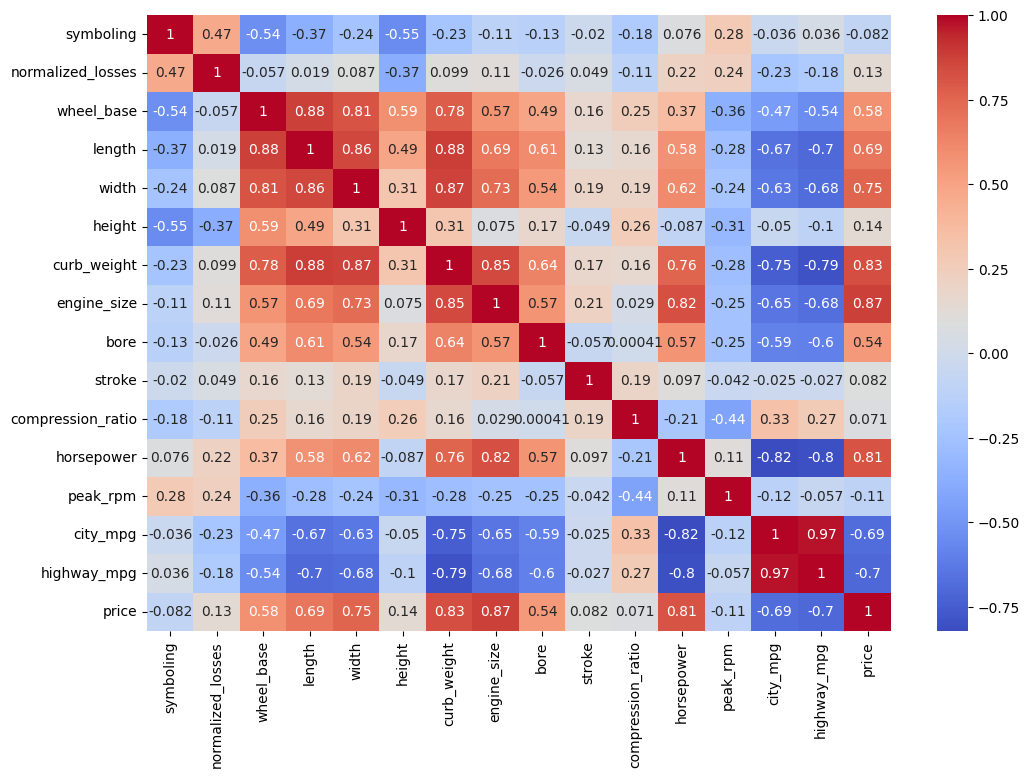

In [11]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix , cmap = 'coolwarm', annot= True)
plt.show()

## Correlation between two variables ( scipy and sns)

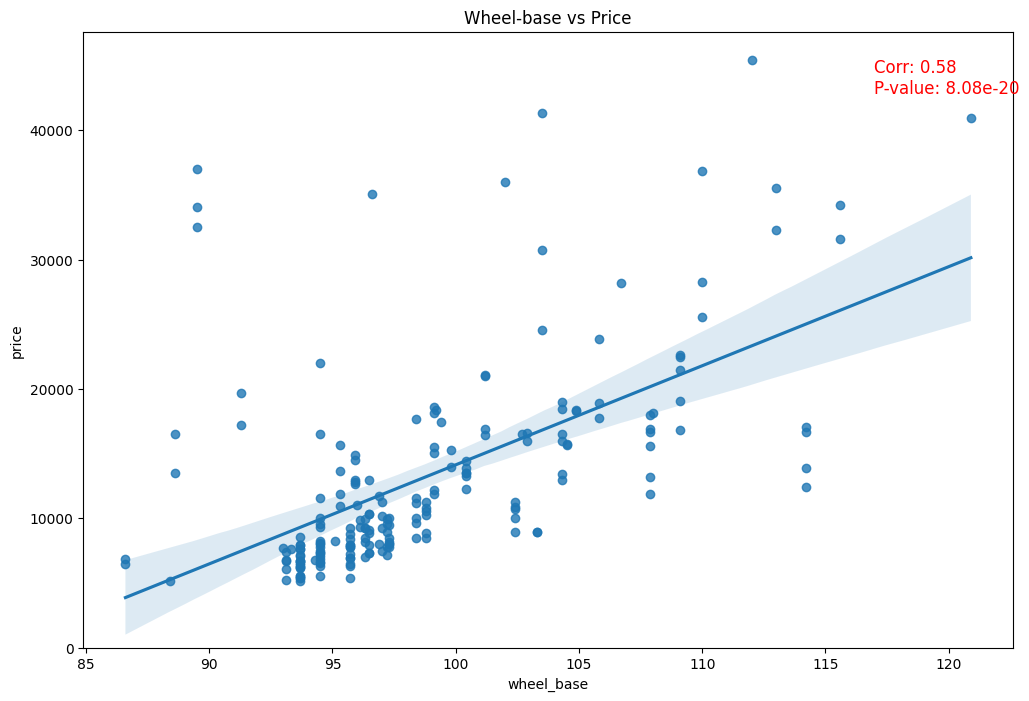

33.64% of the variation in car price can be explained by the variation in wheel_base


In [12]:
sns.regplot( x= 'wheel_base', y = 'price', data = df, dropna= True).set(title ='Wheel-base vs Price')
plt.ylim(0)

# Calculate correlation coefficient and p-value
corr_coef, p_value = pearsonr(df["wheel_base"], df["price"])

# Format correlation coefficient and p-value
corr_coef = round(corr_coef, 2)
p_value = "{:.2e}".format(p_value)

# Annotate plot with correlation coefficient and p-value
textstr = f"Corr: {corr_coef}\nP-value: {p_value}"
plt.annotate(textstr, xy=(0.85, 0.90), xycoords='axes fraction', fontsize=12, color="red")

# Show plot
plt.show()

print("{}% of the variation in car price can be explained by the variation in wheel_base".format(np.square(corr_coef)*100))

## Correlation between two variables ( pingouin and sns)

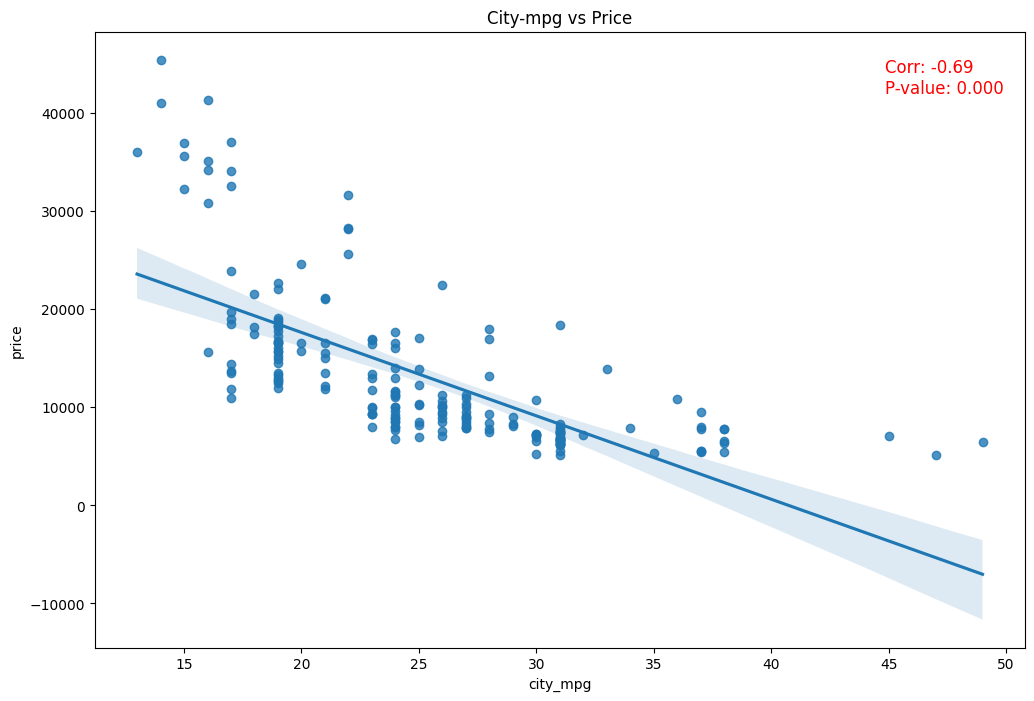

47.61% of the variation in car price can be explained by the variation in city_mpg


In [29]:
corr_result =df[['city_mpg', 'price']].rcorr(method = 'pearson', stars = False)

p_value = corr_result.iloc[0,1]
corr_coef = round(float(corr_result.iloc[1,0]),2)

sns.regplot( x= 'city_mpg', y = 'price', data = df, dropna= True).set(title ='City-mpg vs Price')
#plt.ylim(0)
# Annotate plot with correlation coefficient and p-value
textstr = f"Corr: {corr_coef}\nP-value: {p_value}"
plt.annotate(textstr, xy=(0.85, 0.90), xycoords='axes fraction', fontsize=12, color="red")

# Show plot
plt.show()


print("{:.2f}% of the variation in car price can be explained by the variation in city_mpg".format(np.square(corr_coef)*100))